In [1]:
setwd("~/WGS/SNPS/All_mylu/thetas/")
require("ggplot2")
require("data.table")

Loading required package: ggplot2
Loading required package: data.table


plot density distribution of sliding window http://www.ibg.uu.se/digitalAssets/178/c_178526-l_3-k_moore-david-arbete.pdf


In [2]:
NYE=fread("NY_E_thet.thetas_sw2", header=FALSE, sep=" ")

Warning message in fread("NY_E_thet.thetas_sw2", header = FALSE, sep = " "):
“Starting data input on line 2 and discarding line 1 because it has too few or too many items to be column names or data: # indexStart,indexStop firstPos_withData,lastPos_withData WinStart,WinStop Chr tW Tajima”

Read 970771 rows and 6 (of 6) columns from 0.069 GB file in 00:00:06


In [3]:
NYU=fread("NY_U_thet.thetas_sw2", header=FALSE, sep=" ")

Warning message in fread("NY_U_thet.thetas_sw2", header = FALSE, sep = " "):
“Starting data input on line 2 and discarding line 1 because it has too few or too many items to be column names or data: # indexStart,indexStop firstPos_withData,lastPos_withData WinStart,WinStop Chr tW Tajima”

Read 970813 rows and 6 (of 6) columns from 0.069 GB file in 00:00:05


In [4]:
NJE=fread("NJ_E_thet.thetas_sw2", header=FALSE, sep=" ")

Warning message in fread("NJ_E_thet.thetas_sw2", header = FALSE, sep = " "):
“Starting data input on line 2 and discarding line 1 because it has too few or too many items to be column names or data: # indexStart,indexStop firstPos_withData,lastPos_withData WinStart,WinStop Chr tW Tajima”

Read 970809 rows and 6 (of 6) columns from 0.069 GB file in 00:00:06


In [5]:
NJU=fread("NJ_U_thet.thetas_sw2", header=FALSE, sep=" ")

Warning message in fread("NJ_U_thet.thetas_sw2", header = FALSE, sep = " "):
“Starting data input on line 2 and discarding line 1 because it has too few or too many items to be column names or data: # indexStart,indexStop firstPos_withData,lastPos_withData WinStart,WinStop Chr tW Tajima”

Read 970758 rows and 6 (of 6) columns from 0.069 GB file in 00:00:06


In [6]:
VTE=fread("VT_E_thet.thetas_sw2", header=FALSE, sep=" ")

Warning message in fread("VT_E_thet.thetas_sw2", header = FALSE, sep = " "):
“Starting data input on line 2 and discarding line 1 because it has too few or too many items to be column names or data: # indexStart,indexStop firstPos_withData,lastPos_withData WinStart,WinStop Chr tW Tajima”

Read 970794 rows and 6 (of 6) columns from 0.069 GB file in 00:00:05


In [15]:
VTU=fread("VT_U_thet.thetas_sw2", header=FALSE, sep=" ")

Warning message in fread("VT_U_thet.thetas_sw2", header = FALSE, sep = " "):
“Starting data input on line 2 and discarding line 1 because it has too few or too many items to be column names or data: # indexStart,indexStop firstPos_withData,lastPos_withData WinStart,WinStop Chr tW Tajima”

Read 970825 rows and 6 (of 6) columns from 0.069 GB file in 00:00:06


Had previously been using the wrong file, had turned the chromosome file into the sw2 file (thats why its so weird)

In [16]:
colnames(NYE)=c("indexstartstop", "firstPos_withData", "WindowStartStop", "Scaffold", "tW", "D")
colnames(NYU)=c("indexstartstop", "firstPos_withData", "WindowStartStop", "Scaffold", "tW", "D")
colnames(NJE)=c("indexstartstop", "firstPos_withData", "WindowStartStop", "Scaffold", "tW", "D")
colnames(NJU)=c("indexstartstop", "firstPos_withData", "WindowStartStop", "Scaffold", "tW", "D")
colnames(VTE)=c("indexstartstop", "firstPos_withData", "WindowStartStop", "Scaffold", "tW", "D")
colnames(VTU)=c("indexstartstop", "firstPos_withData", "WindowStartStop", "Scaffold", "tW", "D")


In [17]:
head(VTU)

indexstartstop,firstPos_withData,WindowStartStop,Scaffold,tW,D
"0,9952","1,10001","1,10001",GL429767,80.63573,-1.041713
"2000,11952","2001,12001","2001,12001",GL429767,81.68208,-1.205811
"4000,13885","4001,14001","4001,14001",GL429767,86.01592,-1.099953
"6000,15885","6001,16001","6001,16001",GL429767,87.43927,-1.078402
"8000,17885","8001,18001","8001,18001",GL429767,90.00257,-1.104801
"9952,19885","10001,20001","10001,20001",GL429767,86.86003,-1.222669


In [18]:
NY=merge(NYE, NYU, by=c("Scaffold", "firstPos_withData"), all=T)
VT=merge(VTE, VTU, by=c("Scaffold", "firstPos_withData"), all=T)
NJ=merge(NJE, NJU, by=c("Scaffold", "firstPos_withData"), all=T)

In [19]:
NY$diffD=NY$D.x-NY$D.y
NJ$diffD=NJ$D.x-NJ$D.y
VT$diffD=VT$D.x-VT$D.y

In [28]:
plotNY=ggplot(data=NY, aes(x=Scaffold, y=diffD))+
  geom_point(data=NY)+ theme_bw()+theme(axis.text.x=element_blank(), panel.grid.minor = element_blank(), panel.grid.major = element_blank())+ ggtitle("NY")+theme(plot.title = element_text(hjust = 0.5))

Warning message:
“Removed 1024635 rows containing missing values (geom_point).”

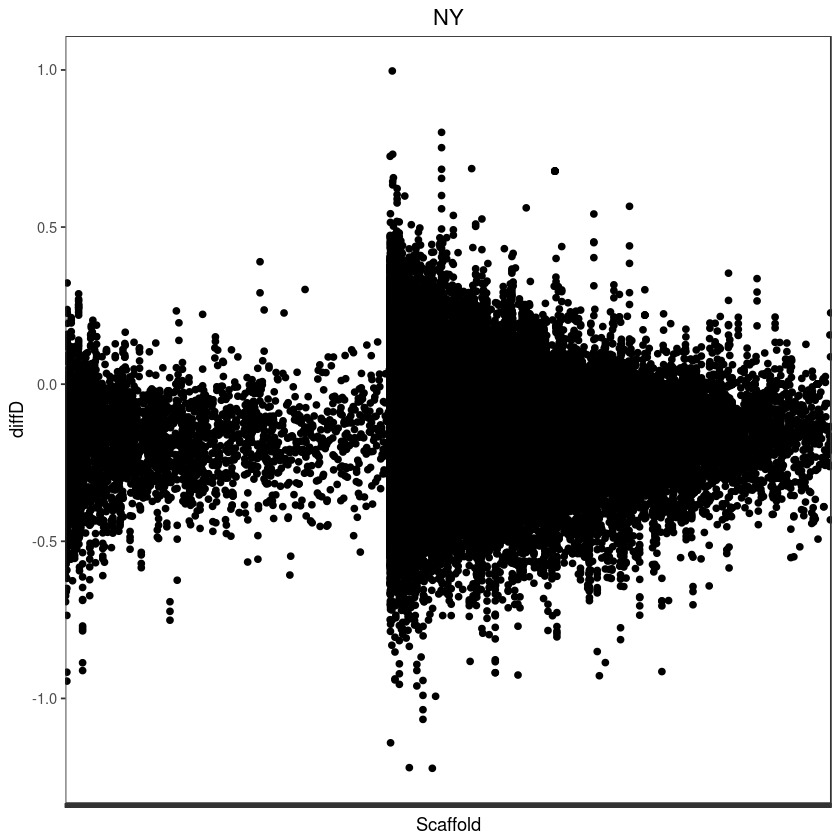

In [29]:
plotNY

In [58]:
NYlow=NY[NY$diffD<(-.5),]
NROW(NYlow)
#print(NYlow)

[1] 1500

Warning message:
“Removed 1070375 rows containing missing values (geom_point).”

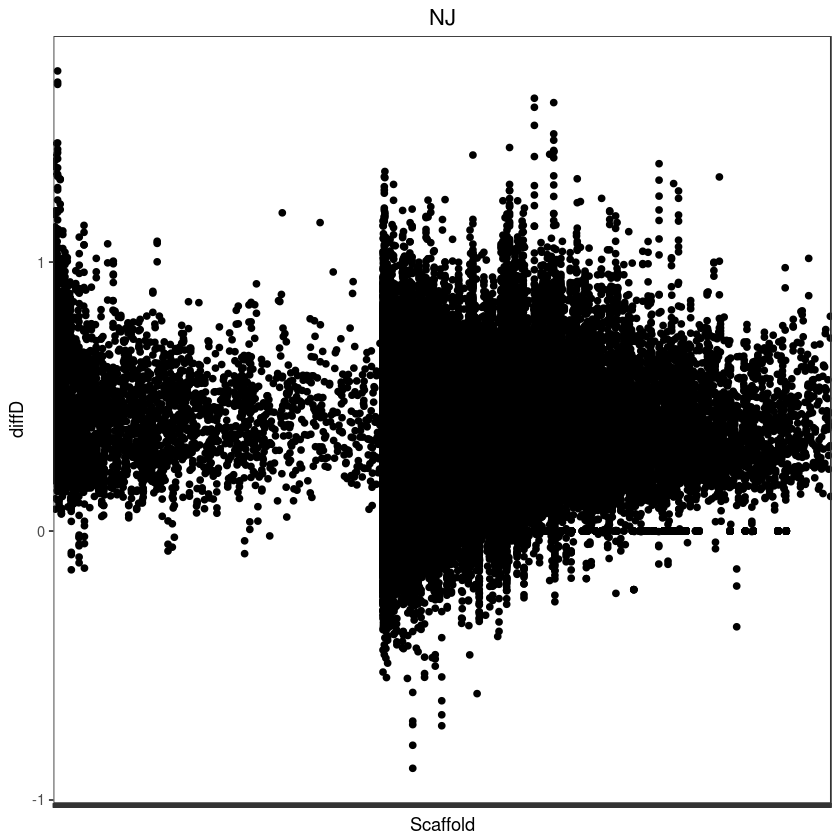

In [43]:
plotNJ

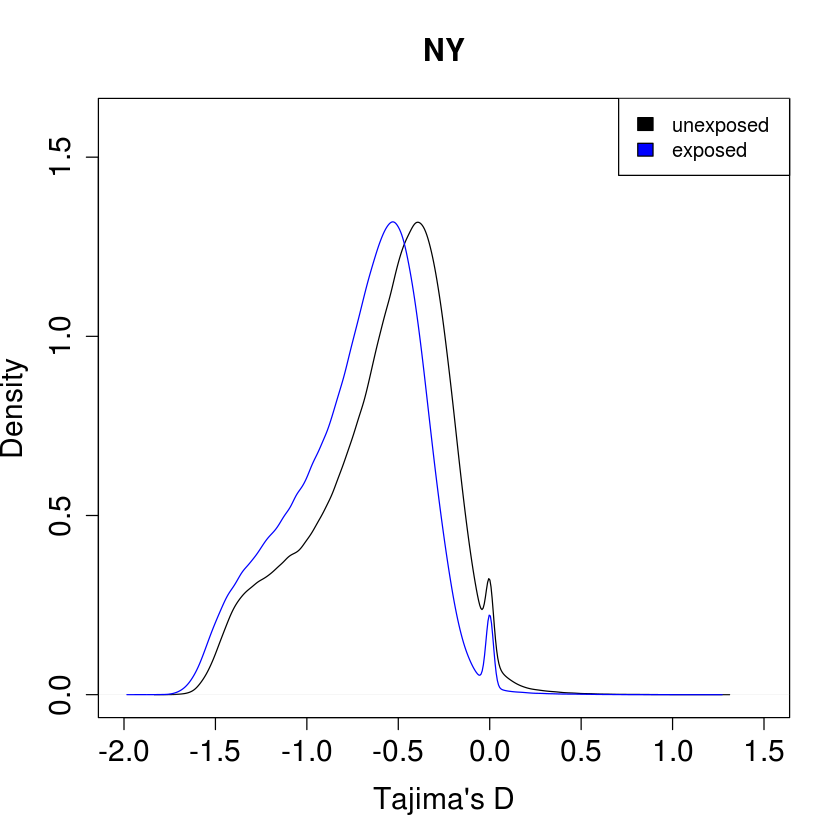

In [34]:
plot(density(NYU$D), main="NY", cex.main=1.5, xlab="Tajima's D", cex.lab=1.5, cex.axis=1.5, xlim = c(-2,1.5), ylim=c(0,1.6))
lines(density(NYE$D), col="blue") 
legend("topright", c("unexposed", "exposed"), fill=c("black", "blue"))

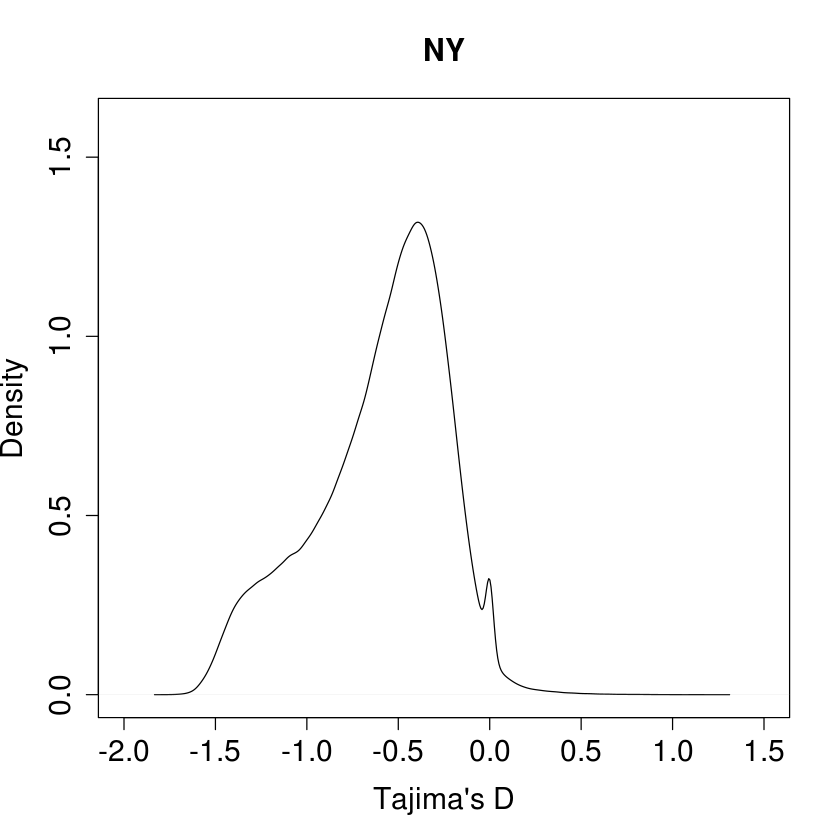

In [10]:
plot(density(NYU$D), main="NY", cex.main=1.5, xlim = c(-2,1.5), ylim=c(0,1.6), xlab="Tajima's D", cex.lab=1.5, cex.axis=1.5)

In [ ]:
plotNJ=ggplot(data=NJ, aes(x=Scaffold, y=diffD))+
  geom_point(data=NJ)+ theme_bw()+theme(axis.text.x=element_blank(), panel.grid.minor = element_blank(), panel.grid.major = element_blank())+ ggtitle("NJ")+theme(plot.title = element_text(hjust = 0.5))

Warning message:
“Removed 1070375 rows containing missing values (geom_point).”

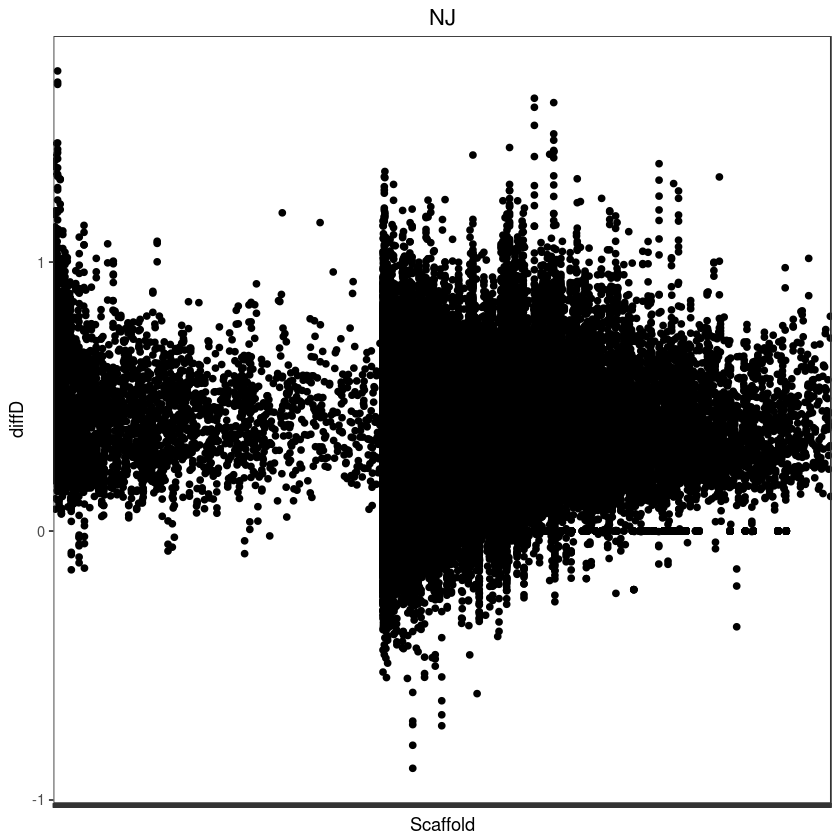

In [44]:
plotNJ

In [57]:
NJlow=NJ[NJ$diffD<(-.5),]
NROW(NJlow)
#print(NJlow)

[1] 16

In [59]:
NJNYlow=merge(NJlow, NYlow, by=c("Scaffold", "firstPos_withData"))

In [60]:
NJNYlow

Scaffold,firstPos_withData,indexstartstop.x.x,WindowStartStop.x.x,tW.x.x,D.x.x,indexstartstop.y.x,WindowStartStop.y.x,tW.y.x,D.y.x,diffD.x,indexstartstop.x.y,WindowStartStop.x.y,tW.x.y,D.x.y,indexstartstop.y.y,WindowStartStop.y.y,tW.y.y,D.y.y,diffD.y
GL429973,"132001,142001","129654,139654","132001,142001",102.250717,-1.113484,"129389,139389","132001,142001",149.595790,-0.231314,-0.882170,"129099,139099","132001,142001",136.817815,-0.980294,"129458,139458","132001,142001",140.832268,-0.442632,-0.537662
GL430419,"435462,436001","309627,310166","426001,436001",3.005411,-1.004276,"309082,309621","426001,436001",7.512886,-0.399731,-0.604545,"308964,309503","426001,436001",5.370516,-1.226081,"310284,310823","426001,436001",6.198676,-0.433523,-0.792558


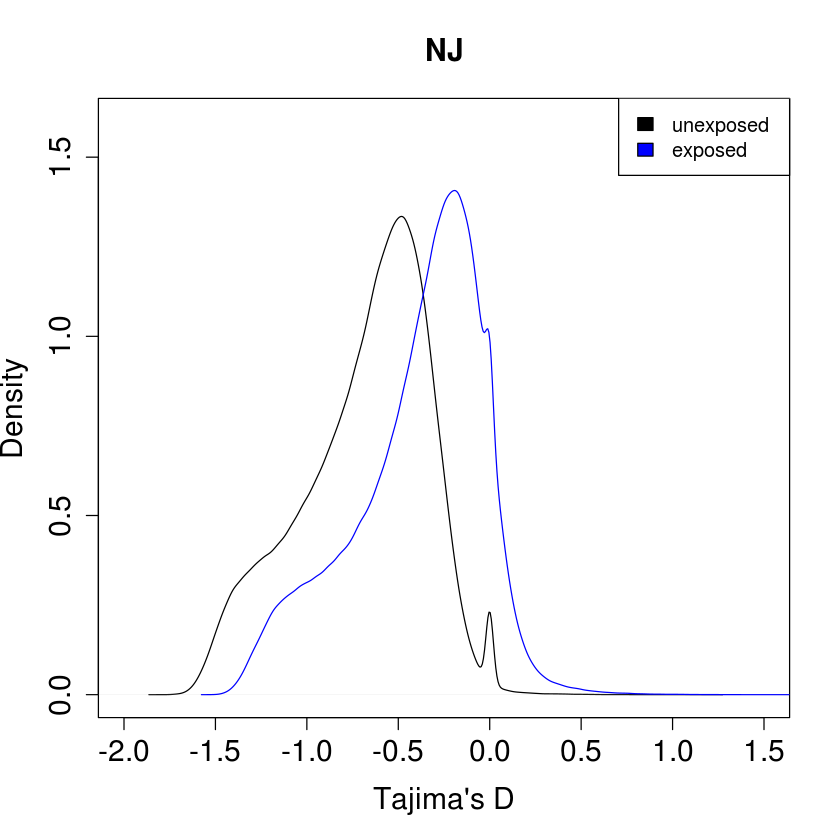

In [16]:
plot(density(NJU$D), main="NJ", cex.main=1.5, xlab="Tajima's D", cex.lab=1.5, cex.axis=1.5, xlim = c(-2,1.5), ylim=c(0,1.6)) 
lines(density(NJE$D), col="blue") 
legend("topright", c("unexposed", "exposed"), fill=c("black", "blue"))

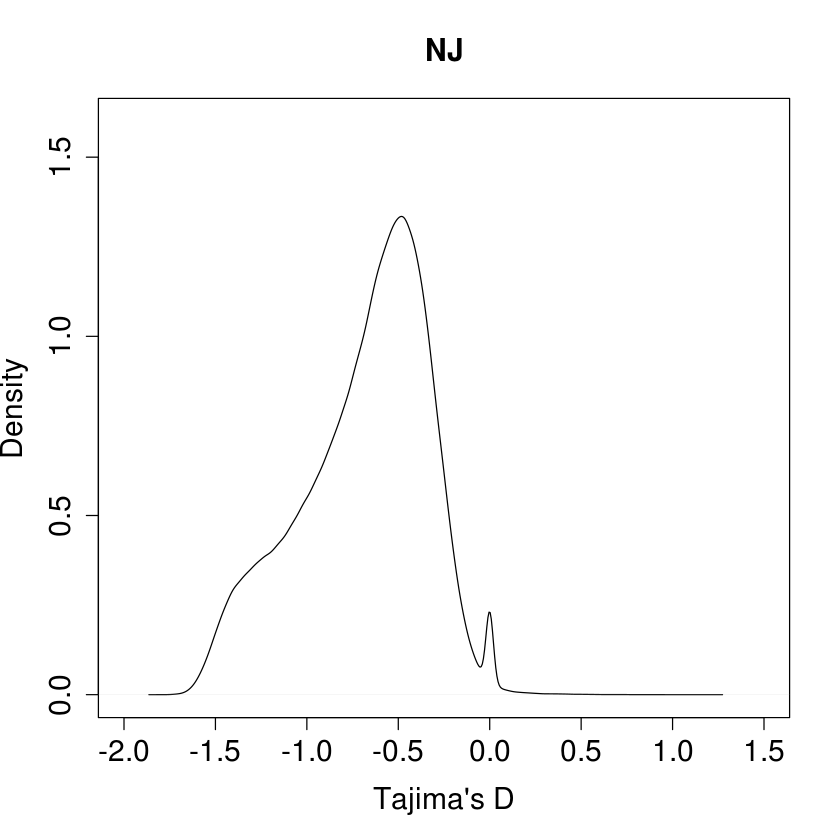

In [12]:
plot(density(NJU$D), main="NJ", cex.main=1.5, xlab="Tajima's D", cex.lab=1.5, cex.axis=1.5, xlim = c(-2,1.5), ylim=c(0,1.6)) 

In [20]:
plotVT=ggplot(data=VT, aes(x=Scaffold, y=diffD))+
  geom_point(data=VT)+ theme_bw()+theme(axis.text.x=element_blank(), panel.grid.minor = element_blank(), panel.grid.major = element_blank())+ ggtitle("VT")+theme(plot.title = element_text(hjust = 0.5))

In [22]:
head(VT)

Scaffold,firstPos_withData,indexstartstop.x,WindowStartStop.x,tW.x,D.x,indexstartstop.y,WindowStartStop.y,tW.y,D.y,diffD
AAPE02055386,"1,10001","0,9953","1,10001",98.17620,-0.274560,"0,10000","1,10001",100.13782,-0.063801,-0.210759
AAPE02055386,"100001,110001","99715,109715","100001,110001",85.62693,-0.529910,"99884,109884","100001,110001",87.93852,-0.320983,-0.208927
AAPE02055386,"10001,20001","9953,19924","10001,20001",98.54760,-0.786671,"10000,19975","10001,20001",87.49247,-0.606641,-0.180030
AAPE02055386,"102001,112001","101715,111715","102001,112001",85.19193,-0.533602,"101884,111884","102001,112001",84.24241,-0.362975,-0.170627
AAPE02055386,"104001,114001","103715,113715","104001,114001",89.16034,-0.547834,"103884,113884","104001,114001",83.19086,-0.480194,-0.067640
AAPE02055386,"106001,116001","105715,115715","106001,116001",89.93201,-0.604366,"105884,115884","106001,116001",81.69282,-0.492304,-0.112062


Warning message:
“Removed 919955 rows containing missing values (geom_point).”

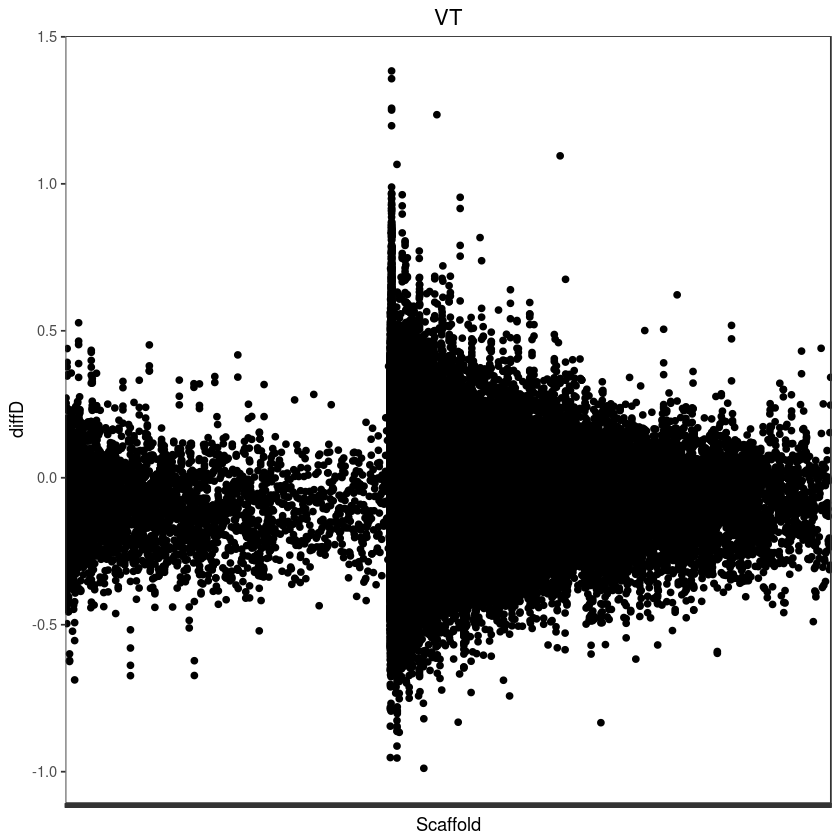

In [23]:
plotVT

In [26]:
VTlow=VT[VT$diffD<(-.6),]
NROW(VTlow)
print(VTlow)

[1] 134

         Scaffold firstPos_withData indexstartstop.x WindowStartStop.x
  1: AAPE02058028       48001,58001      47940,57940       48001,58001
  2: AAPE02058028       50001,60001      49940,59940       50001,60001
  3: AAPE02059606       14001,24001      14000,24000       14001,24001
  4: AAPE02062975           1,10001           0,9867           1,10001
  5: AAPE02062975        2001,12001       2000,11866        2001,12001
 ---                                                                  
130:     GL430478       56001,70891      42137,43450       56001,66001
131:     GL430564     191765,192086    131185,131506     182086,192086
132:     GL430607     190057,192001    164696,166639     182001,192001
133:     GL431250       46001,56001      37440,39002       46001,56001
134:     GL431496       14001,24001      13452,14260       14001,24001
          tW.x       D.x indexstartstop.y WindowStartStop.y       tW.y
  1: 16.010747 -0.725730      47901,57901       48001,58001  11.450726
  2: 1

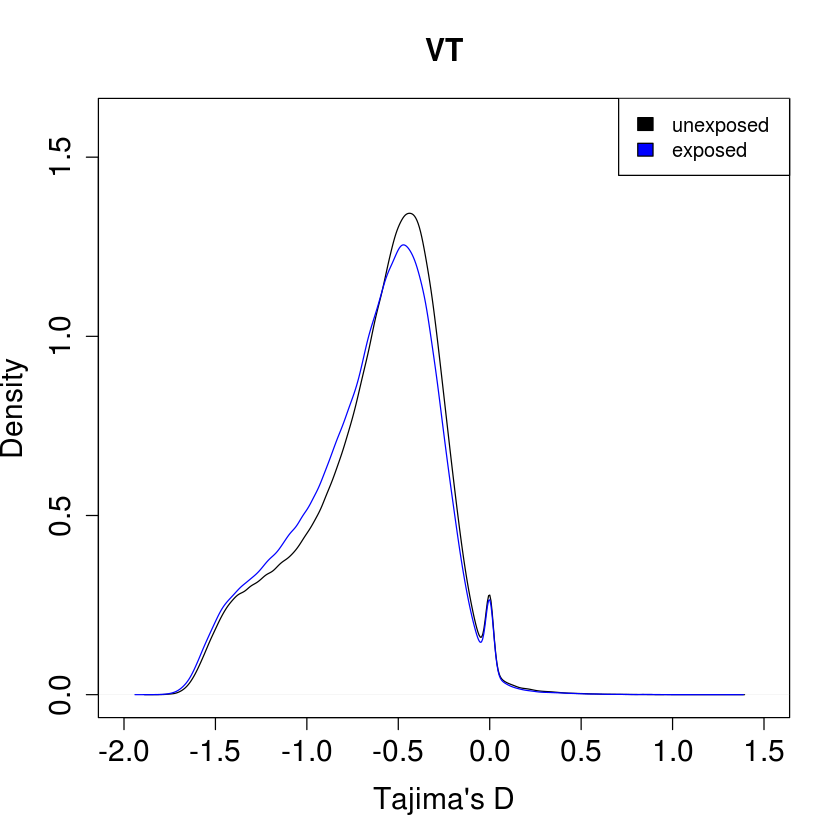

In [25]:
plot(density(VTU$D), main="VT", cex.main=1.5, xlab="Tajima's D", cex.lab=1.5, cex.axis=1.5, xlim = c(-2,1.5), ylim=c(0,1.6)) 
lines(density(VTE$D), col="blue") 
legend("topright", c("unexposed", "exposed"), fill=c("black", "blue"))

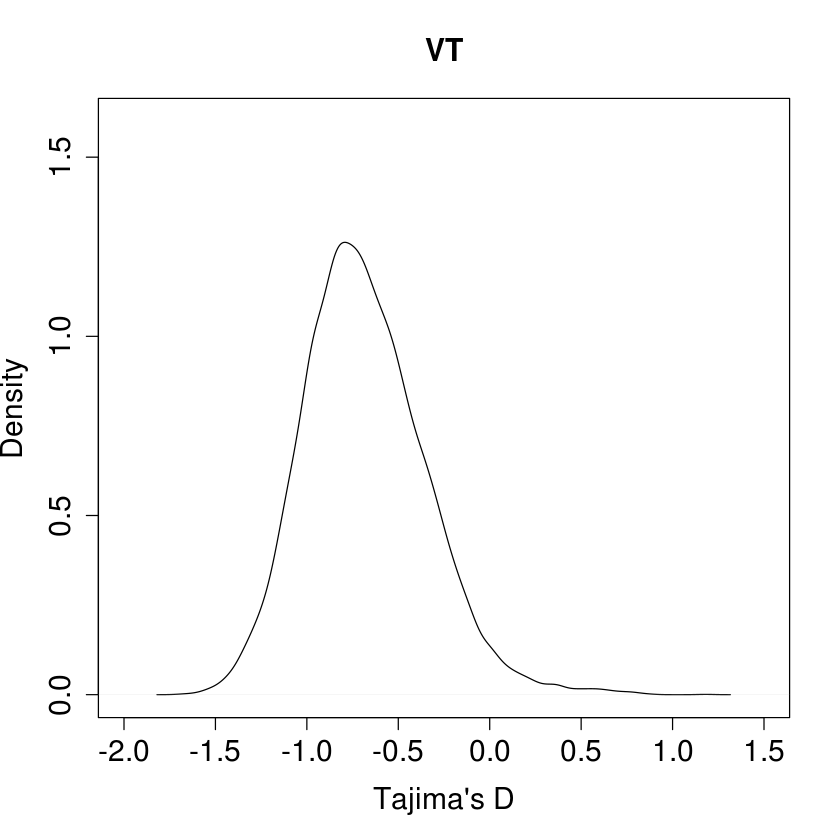

In [29]:
plot(density(VTU$D), main="VT", cex.main=1.5, xlab="Tajima's D", cex.lab=1.5, cex.axis=1.5, xlim = c(-2,1.5), ylim=c(0,1.6)) 

I think that what is happening is that NY is ahead of NJ and VT in terms of recovery after bottleneck, so Tajimas D has becom negative again. 
Need to look at why VT is weirdly shaped